A python implementation of Kruskal's algorithm for finding a minimum-weight spanning tree (MST). I used the graph below and corresponding MST (drawn in dark blue) as an initial test case. I first tried to use the built-in networkx implementation of Kruskal's algorithm, but found it likely contaons a bug as I could not produce the correct MST. I wrote a kruskals() function thta fixes the issue.



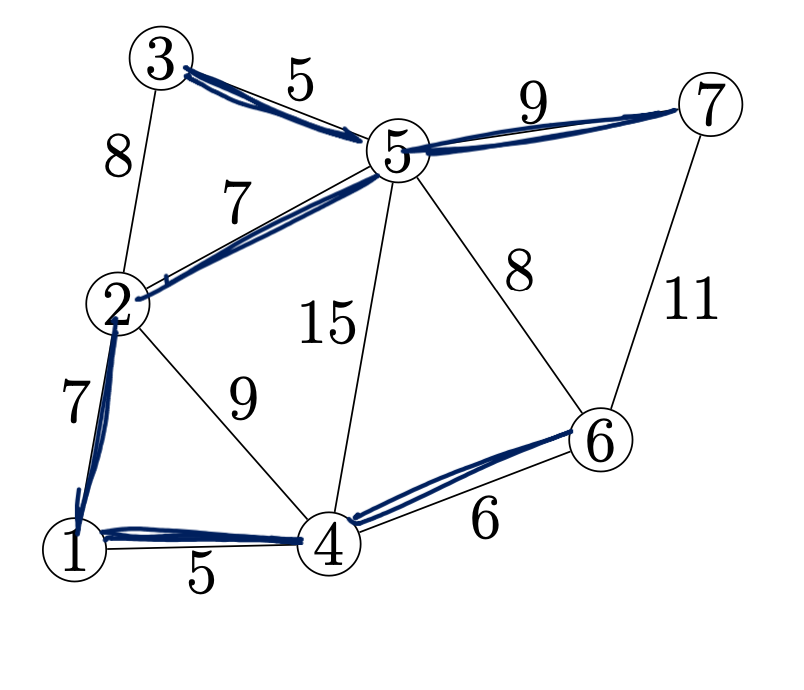

{(1, 2): Text(-100.0, -50.0, '7'),
 (1, 4): Text(-50.0, -100.0, '5'),
 (2, 3): Text(-100.0, 50.0, '8'),
 (3, 5): Text(-50.0, 75.0, '5'),
 (2, 5): Text(-50.0, 25.0, '7'),
 (2, 4): Text(-50.0, -50.0, '9'),
 (4, 5): Text(0.0, -25.0, '15'),
 (5, 6): Text(50.0, 0.0, '8'),
 (5, 7): Text(50.0, 75.0, '9'),
 (6, 7): Text(100.0, 25.0, '11'),
 (4, 6): Text(50.0, -75.0, '6')}

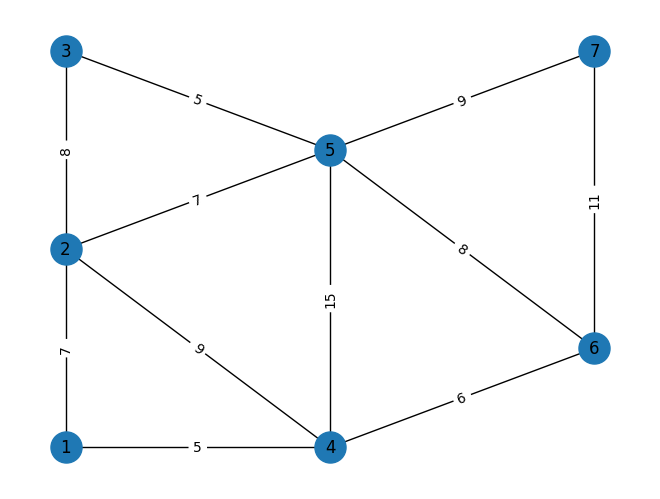

In [ ]:
import networkx as nx
import matplotlib as plt

G = nx.Graph()

# Instantiate a dictionary with node labels as keys and positions as values.
node_pos_dict = {1: (-100,-100), 2: (-100,0), 3: (-100,100),
                 4: (0,-100), 5: (0,50), 6: (100,-50), 7: (100,100)}

G.add_nodes_from(node_pos_dict)

# The 2-tuple keys represent edges with the two numbers being the adjacent node labels. The values represent the edge weights.
graph_dict = {(1,2): 7, (1,4): 5, (2,3): 8, (3,5): 5, (2,5): 7, (2,4): 9,
              (4,5): 15, (5,6): 8, (5,7): 9, (6,7): 11, (4,6): 6}

G.add_edges_from(graph_dict)

nx.draw(G, node_pos_dict, node_size=500, with_labels=True)
nx.draw_networkx_edge_labels(G, node_pos_dict, edge_labels=graph_dict)

I tried using the networkx built-in minimum_spanning_tree function...

{(1, 2): Text(-100.0, -50.0, '7'),
 (1, 4): Text(-50.0, -100.0, '5'),
 (2, 3): Text(-100.0, 50.0, '8'),
 (3, 5): Text(-50.0, 75.0, '5'),
 (2, 5): Text(-50.0, 25.0, '7'),
 (2, 4): Text(-50.0, -50.0, '9'),
 (4, 5): Text(0.0, -25.0, '15'),
 (5, 6): Text(50.0, 0.0, '8'),
 (5, 7): Text(50.0, 75.0, '9'),
 (6, 7): Text(100.0, 25.0, '11'),
 (4, 6): Text(50.0, -75.0, '6')}

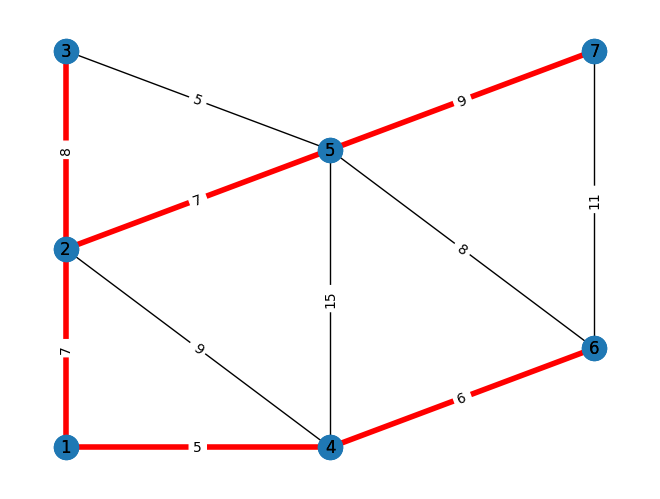

In [ ]:
T = nx.minimum_spanning_tree(G, algorithm='kruskal')

nx.draw(G, node_pos_dict, with_labels=True, edge_color='black')
nx.draw(T, node_pos_dict, with_labels=True, edge_color='red', width=4)
nx.draw_networkx_edge_labels(G, node_pos_dict, edge_labels=graph_dict)

... but it didn't produce a correct MST! the edge incident to 2 and 3 should be deleted and replaced with the edge incident to 3 and 5, since the latter is cheaper. Likely there is a bug in the networkx code.

So I tried my hand at writing my own approach, starting with a helper function to check for cycles (it uses the built-in networkx function find_cycle but converts the result to a boolean)

In [ ]:
def check_for_cycle(Graph):
  """ returns true if a cycle exists and false if not."""

  try:
    nx.find_cycle(Graph)

  except:
    return False

  return True


In [ ]:
def build_graph_from_edge_dict(edge_dict):
  G = nx.Graph()
  G.add_edges_from(edge_dict)
  return G

Then here is my implementation of Kruskal's algoritm:

In [ ]:
def kruskals(edge_dict):

  G = build_graph_from_edge_dict(edge_dict)

  T = nx.Graph()
  T.add_nodes_from(G)

  sorted_edge_dict = dict(sorted(edge_dict.items(), key=lambda item: item[1]))

  for key in sorted_edge_dict:
    T.add_edge(key[0], key[1])

    if check_for_cycle(T):
      T.remove_edge(key[0], key[1])

  return T

Here we call the kruskals function I wrote and display the graph G with MST overlaid:

{(1, 2): Text(-100.0, -50.0, '7'),
 (1, 4): Text(-50.0, -100.0, '5'),
 (2, 3): Text(-100.0, 50.0, '8'),
 (3, 5): Text(-50.0, 75.0, '5'),
 (2, 5): Text(-50.0, 25.0, '7'),
 (2, 4): Text(-50.0, -50.0, '9'),
 (4, 5): Text(0.0, -25.0, '15'),
 (5, 6): Text(50.0, 0.0, '8'),
 (5, 7): Text(50.0, 75.0, '9'),
 (6, 7): Text(100.0, 25.0, '11'),
 (4, 6): Text(50.0, -75.0, '6')}

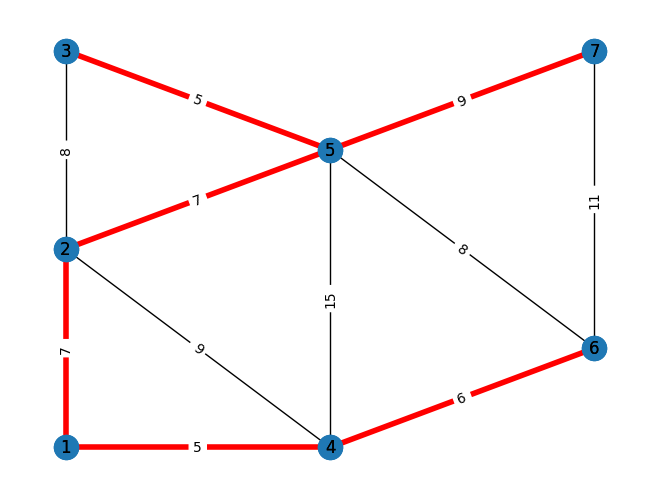

In [ ]:
T = kruskals(graph_dict)

nx.draw(G, node_pos_dict, with_labels=True, edge_color='black')
nx.draw(T, node_pos_dict, with_labels=True, edge_color='red', width=4)
nx.draw_networkx_edge_labels(G, node_pos_dict, edge_labels=graph_dict)


Let's see another example. Here we use the nx.draw_circular function so we don't have to specify the node positions. In fact all we have to specify is the edges and their weights, and the kruskal's function does the rest.

{(1, 5): Text(0.654508476093664, 0.47552828417802706, '6'),
 (1, 3): Text(0.09549147175227024, 0.2938926307527015, '4'),
 (1, 4): Text(0.09549150155459352, -0.2938926605550248, '3'),
 (2, 4): Text(-0.24999994784593424, -0.7694209149307285, '7'),
 (3, 4): Text(-0.8090170266931362, -2.980232327587373e-08, '5'),
 (4, 5): Text(-0.25000002235174246, 0.18163562362300228, '11')}

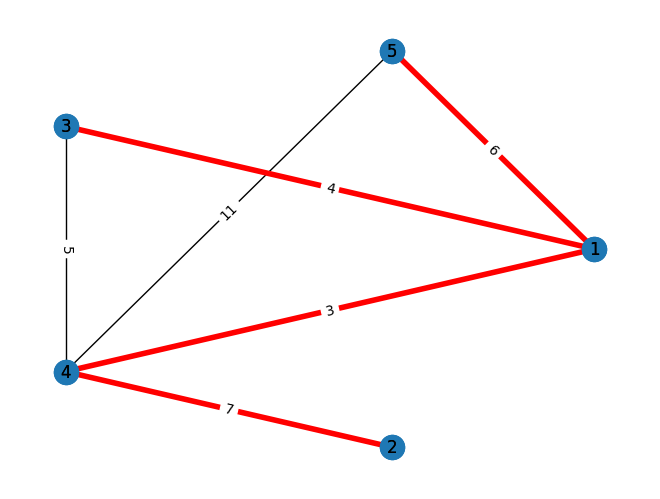

In [ ]:
edge_dict_2 = {(1,5): 10, (1,3): 4, (1,4): 3, (2,4): 7, (3,4): 5, (4,5): 11, (1,5): 6}

G2 = build_graph_from_edge_dict(edge_dict_2)
MST = kruskals(edge_dict_2)

nx.draw_circular(G2, with_labels=True, edge_color='black')
nx.draw_circular(MST, with_labels=True, edge_color='red', width=4)
nx.draw_networkx_edge_labels(G2, nx.circular_layout(G2), edge_labels=edge_dict_2)
